# Chapter 6: Decision Trees

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
x = iris.data[:, 2:] #petal length, width
y = iris.target

In [2]:
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
)

Run `dot -Tpng iris_tree.dot -o iris_tree.png` (from graphviz package) to generate graph

![graph1](iris_tree.png)

gini is a measure of the impurity of each node

CART (Classification and Regression Tree) algorithm successively splits data such that the resulting groups have the smallest impurity possible (normalized to node size)

Finding an optimal tree is an NP-complete problem (it requires O(exp(m)) time)

Defaults to using Gini impurity, but can use entropy instead.

Entropy of ith node

\begin{align}
\large
H_i = -\sum_{k=1}^{n}p_{i,k} log(p_{i,i})
\end{align}

Gini impurity and entropy usually give similar trees. Gini slightly faster, entropy slightly more balanced trees.

## Regularization hyperparamaters

Usually want to regularize decision tree. (nonparametric models, with no pre-decided paramaters, are usually bad models, as they fit training data very closesly and usually overfit)

max_depth should be set usually

also can set min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_leaf_nodes, max_features

## Regression

In [7]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 2)
tree_reg.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Works identically to classifier, but instead of a cost function dependant on gini impurity/entropy, it depends on mean squared error of each leaf.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.datasets import make_moons

moon_pts, moon_class = make_moons(500, noise = 0.05)

x = moon_pts[moon_class == 1,0]
y = moon_pts[moon_class == 1,1]



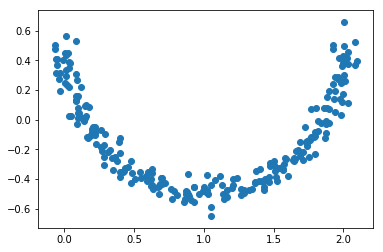

In [49]:
plt.scatter(x,y)
plt.show()

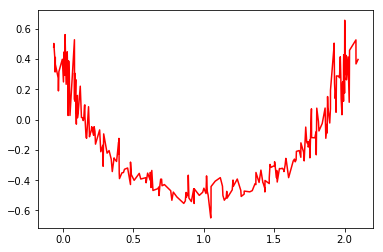

In [56]:
sort_idx = np.argsort(x)
x_sort, y_sort = x[sort_idx], y[sort_idx]

plt.plot(x_sort, y_sort, 'r-')
plt.show()

In [47]:
tree_reg = DecisionTreeRegressor(max_depth = 2)
tree_reg.fit(x.reshape(-1,1), y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [79]:
def plotTreeReg(x, y, max_depth = 2):
    clf = DecisionTreeRegressor(max_depth = max_depth)
    clf.fit(x.reshape(-1,1), y)
    xmin = min(x)
    xmax = max(x)
    xran = np.linspace(xmin, xmax, 100)
    y_pred = clf.predict(xran.reshape(-1,1))
    plt.plot(x, y, 'bo')
    plt.plot(xran, y_pred, 'g-', linewidth = 2)
    plt.title("Max depth: " + str(max_depth))

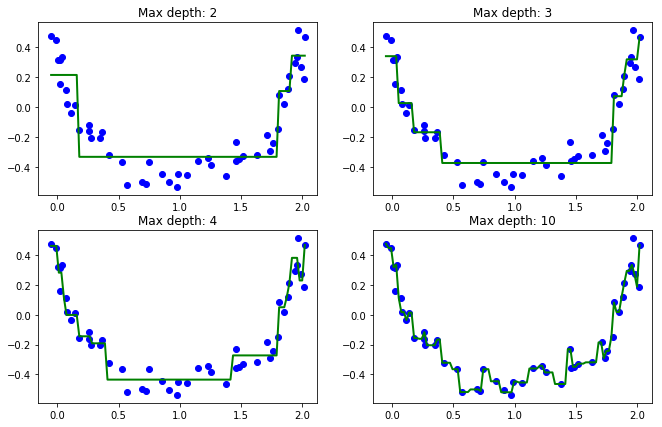

In [81]:
moon_pts, moon_class = make_moons(100, noise = 0.05)

x = moon_pts[moon_class == 1,0]
y = moon_pts[moon_class == 1,1]

plt.figure(figsize=(11,7))
plt.subplot(221)
plotTreeReg(x, y, 2)
plt.subplot(222)
plotTreeReg(x, y, 3)
plt.subplot(223)
plotTreeReg(x, y, 4)
plt.subplot(224)
plotTreeReg(x,y, 10)

## Instability

DTs are powerful, versatile, and simple to visualize.

Limitations:

* Split data orthogonally, so sensitive to rotation (use PCA)
* Very sensitive to small variations in training set (sall changes can result in different trees)
    * Average over many trees

